**Objective of Movie Recommendation System**

The primary objective of a movie recommendation system is to enhance user experience by providing personalized movie suggestions based on individual preferences, viewing history, and behavior. This personalization not only saves users time and effort in finding desirable content but also increases their engagement and satisfaction with the platform. By helping users discover new and relevant movies, the system boosts retention and encourages more frequent use, which is particularly valuable for commercial platforms aiming to increase viewership and revenue. Overall, an effective recommendation system balances familiarity and novelty, ensuring users enjoy a continually fresh and engaging selection of movies.

**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import Dataset**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Movies%20Recommendation.csv')
df

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,4784,Midnight Cabaret,Horror,en,0,0.001389,01-01-1990,0,94.0,0.0,...,NaN,NaN,A Broadway producer puts on a play with a Devi...,[],[],"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The hot spot where Satan's waitin'.,Lisa Hart Carroll Michael Des Barres Paul Drak...,"[{'name': 'Pece Dingo', 'gender': 0, 'departme...",Pece Dingo
4756,4785,Growing Up Smith,Comedy Family Drama,en,0,0.710870,03-02-2017,0,102.0,7.4,...,http://www.growingupsmithmovie.com,NaN,"In 1979, an Indian family moves to America wit...",[],[],"[{""iso_639_1"": ""en"", ""name"": ""English""}]",It’s better to stand out than to fit in.,Roni Akurati Brighton Sharbino Jason Lee Anjul...,"[{'name': 'Frank Lotito', 'gender': 0, 'depart...",Frank Lotito
4757,4786,8 Days,Thriller Drama,en,0,0.015295,15-06-2014,0,90.0,0.0,...,NaN,christian film sex trafficking,"After sneaking to a party with her friends, 16...","[{""name"": "

In [3]:
df.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


**Describe Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [5]:
df.shape

(4760, 21)

In [6]:
df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

**Get Feature Selection**

In [7]:
df_features = df[['Movie_Genre','Movie_Keywords','Movie_Tagline','Movie_Cast','Movie_Director']].fillna('')

In [8]:
df_features.shape

(4760, 5)

In [9]:
df_features

,Movie_Genre,Movie_Keywords,Movie_Tagline,Movie_Cast,Movie_Director
0,Crime Comedy,hotel new year's eve witch bet hotel room,Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,Allison Anders
1,Adventure Action Science Fiction,android galaxy hermit death star lightsaber,"A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,George Lucas
2,Animation Family,father son relationship harbor underwater fish...,"There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,Andrew Stanton
3,Comedy Drama Romance,vietnam veteran hippie mentally disabled runni...,"The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,Robert Zemeckis
4,Drama,male nudity female nudity adultery midlife cri...,Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,Sam Mendes
...,...,...,...,...,...
4755,Horror,,The hot spot where Satan's waitin'.,Lisa Hart Carroll Michael Des Barres Paul Drak...,Pece Dingo
4756,Comedy Family Drama,,It’s better to stand out than to fit in.,Roni Akurati Brighton Sharbino Jason Lee Anjul...,Frank Lotito
4757,Thriller Drama,christian film sex trafficking,She never knew it could happen to her...,Nicole Smolen Kim Baldwin Ariana Stephens Brys...,Jaco Booyens
4758,Family,,,,


**Data Visualization**

<function matplotlib.pyplot.show(close=None, block=None)>

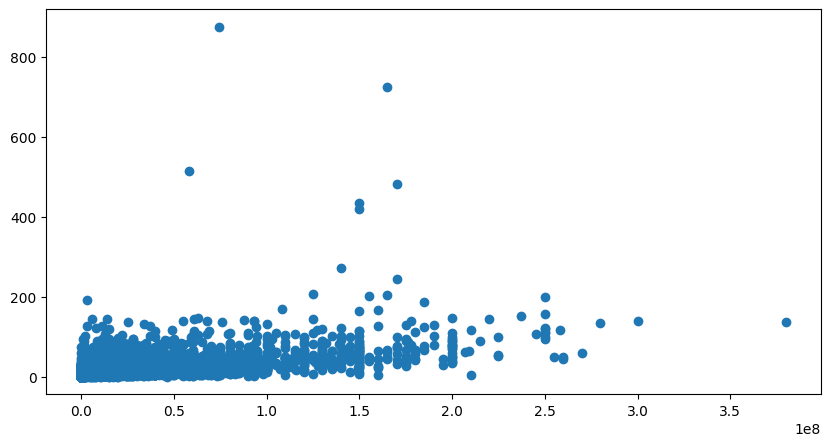

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
plt.scatter(df['Movie_Budget'],df['Movie_Popularity'])
plt.show

In [11]:
df.corr

<bound method DataFrame.corr of       Movie_ID                  Movie_Title                       Movie_Genre  \
0            1                   Four Rooms                      Crime Comedy   
1            2                    Star Wars  Adventure Action Science Fiction   
2            3                 Finding Nemo                  Animation Family   
3            4                 Forrest Gump              Comedy Drama Romance   
4            5              American Beauty                             Drama   
...        ...                          ...                               ...   
4755      4784             Midnight Cabaret                            Horror   
4756      4785             Growing Up Smith               Comedy Family Drama   
4757      4786                       8 Days                    Thriller Drama   
4758      4787              Running Forever                            Family   
4759      4788  To Be Frank, Sinatra at 100                       Documentary   

     Movie_Language  Movie_Budget  Movie_Popularity Movie_Release_Date  \
0                en       4000000         22.876230         09-12-1995   
1                en      11000000        126.393695         25-05-1977   
2                en      94000000         85.688789         30-05-2003   
3                en      55000000        138.133331         06-07-1994   
4                en      15000000         80.878605         15-09-1999   
...             ...           ...               ...                ...   
4755             en             0          0.001389         01-01-1990   
4756             en             0          0.710870         03-02-2017   
4757             en             0          0.015295         15-06-2014   
4758             en             0          0.028756         27-10-2015   
4759             en             2          0.050625         12-12-2015   

      Movie_Revenue  Movie_Runtime  Movie_Vote  ...  \
0           4300000           98.0         6.5  ...   
1         775398007          121.0         8.1  ...   
2         940335536          100.0         7.6  ...   
3         677945399          142.0         8.2  ...   
4         356296601          122.0         7.9  ...   
...             ...            ...         ...  ...   
4755              0           94.0         0.0  ...   
4756              0          102.0         7.4  ...   
4757              0           90.0         0.0  ...   
4758              0           88.0         0.0  ...   
4759              0            NaN         0.0  ...   

                                         Movie_Homepage  \
0                                                   NaN   
1     http://www.starwars.com/films/star-wars-episod...   
2                 http://movies.disney.com/finding-nemo   
3                                                   NaN   
4                         http://www.dreamworks.com/ab/   
...                                                 ...   
4755                                                NaN   
4756                 http://www.growingupsmithmovie.com   
4757                                                NaN   
4758                                                NaN   
4759                                                NaN   

                                         Movie_Keywords  \
0             hotel new year's eve witch bet hotel room   
1           android galaxy hermit death star lightsaber   
2     father son relationship harbor underwater fish...   
3     vietnam veteran hippie mentally disabled runni...   
4     male nudity female nudity adultery midlife cri...   
...                                                 ...   
4755                                                NaN   
4756                                                NaN   
4757                     christian film sex trafficking   
4758                                                NaN   
4759  music actors legendary perfomer classic hollyw...   

                           

count    4760.000000
mean        6.113866
std         1.141294
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: Movie_Vote, dtype: float64

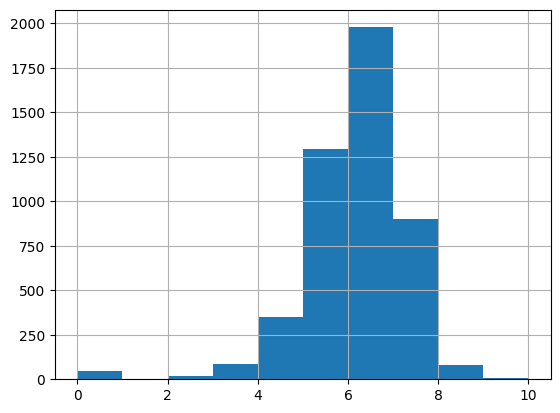

In [12]:
# Describing and Creating a histogram of Movie Vote
df['Movie_Vote'].hist()
df['Movie_Vote'].describe()

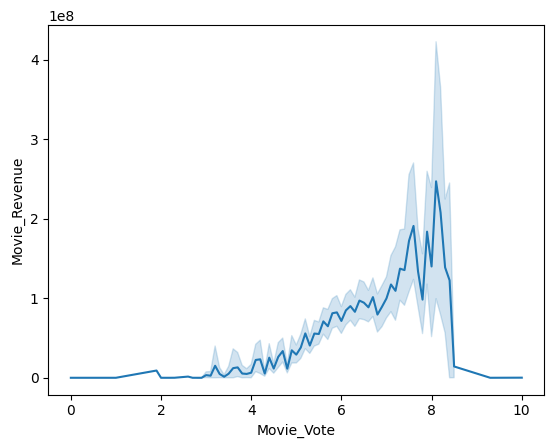

In [13]:
#Creating a line plot of Movie vote vs Movie Revenue
sns.lineplot(x='Movie_Vote',y='Movie_Revenue',data=df)
plt.show()

**Data Preprocessing**

In [14]:
df.isnull().sum()

Movie_ID                       0
Movie_Title                    0
Movie_Genre                    0
Movie_Language                 0
Movie_Budget                   0
Movie_Popularity               0
Movie_Release_Date             0
Movie_Revenue                  0
Movie_Runtime                  2
Movie_Vote                     0
Movie_Vote_Count               0
Movie_Homepage              3061
Movie_Keywords               387
Movie_Overview                 3
Movie_Production_House         0
Movie_Production_Country       0
Movie_Spoken_Language          0
Movie_Tagline                818
Movie_Cast                    27
Movie_Crew                     0
Movie_Director                22
dtype: int64

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
x = df_features['Movie_Genre'] + ' ' + df_features['Movie_Keywords'] + ' ' + df_features['Movie_Tagline'] + ' ' + df_features['Movie_Cast'] + ' ' + df_features['Movie_Director']

In [17]:
x

0       Crime Comedy hotel new year's eve witch bet ho...
1       Adventure Action Science Fiction android galax...
2       Animation Family father son relationship harbo...
3       Comedy Drama Romance vietnam veteran hippie me...
4       Drama male nudity female nudity adultery midli...
                              ...                        
4755    Horror  The hot spot where Satan's waitin'. Li...
4756    Comedy Family Drama  It’s better to stand out ...
4757    Thriller Drama christian film sex trafficking ...
4758                                           Family    
4759    Documentary music actors legendary perfomer cl...
Length: 4760, dtype: object

In [18]:
x.shape

(4760,)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [20]:
tfidv=TfidfVectorizer()

In [21]:
x = tfidv.fit_transform(x)

In [22]:
x.shape

(4760, 17258)

In [23]:
print(x)

  (0, 617)	0.1633382144407513
  (0, 492)	0.1432591540388685
  (0, 15413)	0.1465525095337543
  (0, 9675)	0.14226057295252661
  (0, 9465)	0.1659841367820977
  (0, 1390)	0.16898383612799558
  (0, 7825)	0.09799561597509843
  (0, 1214)	0.13865857545144072
  (0, 729)	0.13415063359531618
  (0, 13093)	0.1432591540388685
  (0, 15355)	0.10477815972666779
  (0, 9048)	0.0866842116160778
  (0, 11161)	0.06250380151644369
  (0, 16773)	0.17654247479915475
  (0, 5612)	0.08603537588547631
  (0, 16735)	0.10690083751525419
  (0, 7904)	0.13348000542112332
  (0, 15219)	0.09800472886453934
  (0, 11242)	0.07277788238484746
  (0, 3878)	0.11998399582562203
  (0, 5499)	0.11454057510303811
  (0, 7071)	0.19822417598406614
  (0, 7454)	0.14745635785412262
  (0, 1495)	0.19712637387361423
  (0, 9206)	0.15186283580984414
  :	:
  (4757, 5455)	0.12491480594769522
  (4757, 2967)	0.16273475835631626
  (4757, 8464)	0.23522565554066333
  (4757, 6938)	0.17088173678136628
  (4757, 8379)	0.17480603856721913
  (4757, 15303)	0.07

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
similarity_score = cosine_similarity(x)

In [26]:
similarity_score

array([[1.        , 0.01351235, 0.03570468, ..., 0.        , 0.        ,
        0.        ],
       [0.01351235, 1.        , 0.00806674, ..., 0.        , 0.        ,
        0.        ],
       [0.03570468, 0.00806674, 1.        , ..., 0.        , 0.08014876,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08014876, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [27]:
similarity_score.shape

(4760, 4760)

In [28]:
movie_name = input("Enter the movie name:")

Enter the movie name:Avengers


In [29]:
movies = df['Movie_Title'].tolist()

In [30]:
import difflib

In [31]:
Movie_recommendation = difflib.get_close_matches(movie_name,movies)
print(Movie_recommendation)

['The Avengers', 'Swingers']


In [32]:
cm = Movie_recommendation[0]
print(cm)

The Avengers


In [33]:
iocmm = df[df.Movie_Title == cm]['Movie_ID'].values[0]
print(iocmm)

2851


In [34]:
Recommended_score = list(enumerate(similarity_score[iocmm]))
print(Recommended_score)

[(0, 0.0), (1, 0.0), (2, 0.029175928462707112), (3, 0.0), (4, 0.0), (5, 0.010646595509281006), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.009823178934154868), (10, 0.0), (11, 0.010992268650837975), (12, 0.0), (13, 0.0), (14, 0.04494381396830523), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.023044349700439632), (19, 0.050618671871964754), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.008780727050744543), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.0), (30, 0.023446610183816732), (31, 0.0), (32, 0.0), (33, 0.0), (34, 0.029585177768751914), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.0), (40, 0.0), (41, 0.0), (42, 0.010857719260326703), (43, 0.0), (44, 0.0), (45, 0.04562444507958086), (46, 0.0), (47, 0.0), (48, 0.0), (49, 0.010289021218276516), (50, 0.0), (51, 0.0), (52, 0.032396908362410826), (53, 0.010172269271289617), (54, 0.010780037242209533), (55, 0.0), (56, 0.0), (57, 0.0), (58, 0.017901621792190264), (59, 0.0), (60, 0.0), (61, 0.0), (62, 0.0), (63, 0.0), (64, 0.03204521691

In [35]:
len(Recommended_score)

4760

In [36]:
sorted_score = sorted(Recommended_score,key=lambda x:x[1],reverse=True)
print(sorted_score)

[(2851, 1.0000000000000002), (1842, 0.185112154007765), (399, 0.17410875104127688), (1951, 0.1541416167860301), (2873, 0.15217639005994807), (3033, 0.14294341366939736), (2188, 0.13826961272466123), (1771, 0.137217345399716), (2372, 0.1286504148742411), (807, 0.12223784054880153), (2123, 0.1217615212844581), (3820, 0.11866110819617565), (3071, 0.11819772068732619), (2187, 0.11536340042575871), (2464, 0.11511463315096931), (4758, 0.11492420890753376), (642, 0.11212844421607168), (154, 0.11066168627636311), (1646, 0.10845101517900768), (1517, 0.10762660423517009), (3027, 0.10411043487548835), (3046, 0.10294581685162776), (4189, 0.10041950390241319), (4122, 0.10031509514158024), (1490, 0.10028616556773204), (2140, 0.09980220997474615), (116, 0.09906297631171815), (3000, 0.09610129948394655), (3322, 0.09556076930409677), (3684, 0.09180334483949215), (1232, 0.0905963650265361), (2833, 0.08946018657951482), (804, 0.08530881066860195), (4319, 0.08524707353303324), (4252, 0.08490981651283293),

In [37]:
print('Top 30 Recommended Movie')

Top 30 Recommended Movie


In [38]:
i=1
for movie in sorted_score:
  index = movie[0]
  title_from_index = df[df.index==index]['Movie_Title'].values[0]
  if i<31:
    print(i,'.',title_from_index)

1 . Doogal
1 . Cats & Dogs
1 . The Color Purple
1 . Fever Pitch
1 . Shorts
1 . Superbabies: Baby Geniuses 2
1 . Brooklyn Rules
1 . Elf
1 . The Rugrats Movie
1 . Bogus
1 . Factory Girl
1 . An Alan Smithee Film: Burn, Hollywood, Burn
1 . How Stella Got Her Groove Back
1 . In the Land of Women
1 . Madea Goes to Jail
1 . Running Forever
1 . In the Bedroom
1 . Magnolia
1 . Freaky Friday
1 . The Benchwarmers
1 . The Deep End of the Ocean
1 . Ghosts of Mississippi
1 . A Walk Among the Tombstones
1 . Getaway
1 . Rat Race
1 . Farce of the Penguins
1 . Ghost
1 . Trucker
1 . The Valley of Decision
1 . The Guard
1 . Death to Smoochy
1 . Happy, Texas
1 . U-571
1 . About Last Night
1 . The Other Woman
1 . Walter
1 . The Italian Job
1 . Zookeeper
1 . Beer League
1 . Role Models
1 . The Yellow Handkerchief
1 . Zathura: A Space Adventure
1 . Wild Hogs
1 . The Lincoln Lawyer
1 . Cellular
1 . Sahara
1 . Free Birds
1 . The Prophecy
1 . Stung
1 . The Sessions
1 . Made
1 . The Smurfs 2
1 . Pride and Glory
1

In [42]:
Movie_name = input('Enter your favourite movie name:')
list_of_all_movies = df['Movie_Title'].tolist()
find_close_match = difflib.get_close_matches(Movie_name,list_of_all_movies)
close_match = find_close_match[0]
index_of_the_movie = df[df.Movie_Title == close_match]['Movie_ID'].values[0]
Recommended_score = list(enumerate(similarity_score[index_of_the_movie]))
sorted_similar_movies = sorted(Recommended_score,key=lambda x:x[1],reverse=True)
print("Top 10 Recommended Movies")
i=1
for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index==index]['Movie_Title'].values[0]
  if i<11:
    print(i,'.',title_from_index)
    i+=1

Enter your favourite movie name:Avataar
Top 10 Recommended Movies
1 . Niagara
2 . Caravans
3 . My Week with Marilyn
4 . Brokeback Mountain
5 . Harry Brown
6 . Night of the Living Dead
7 . The Curse of Downers Grove
8 . The Boy Next Door
9 . Back to the Future
10 . The Juror
